In [1]:
import marlin as mar

## Initialize Liquid Handler

In [2]:
handler_1 = mar.handlerCore()

Connected.
PFA(half-MeAc) flowing to Stage at 0.0 Volts (0%)
PFA(half-MeAc) flowing to Stage at 0.0 Volts (0%)
Handler Ready.


## Liquid Handler Commands

In [8]:
handler_1.set_pump_state(0)

SSC flowing to Stage at 0.0 Volts (0%)


In [ ]:
handler_1.set_valve_state("PFA(half-MeAc)",0)

## Clean Liquid Handler

In [3]:
handler_1.clean(time_per_line=90.,pump_speed=2000)

PFA(half-MeAc) flowing to Stage at 0.0 Volts (0%)
Image flowing to Waste at 0.0 Volts (0%)
Image flowing to Waste at 2.442002442 Volts (48%)


KeyboardInterrupt: 

## Initialize Microscope

In [4]:
Ti5 = mar.scopeCore("./FISH_config_files/MMMain_Iris9.cfg","./logfile.txt",camera_name="Iris 9",shutter_name="SpectraIII",xystage_name="XYStage",focus_name="ZDrive")

## Load Imaging Grid

In [3]:
multipoints_path = "F:/Daniel/2024-01-20_lDE30_Run_2/multipoints.csv"
xy_grid = mar.load_multipoints(multipoints_path,filetype="csv") # can also load from xml

## Check Grid Corners

In [4]:
mar.check_grid_corners(Ti5,xy_grid,wait_time=0)

## Initialize Scheduler

In [22]:
output_folder = "F:/Daniel/2024-03-02_New_Marlin_Code_Test/"

fish = mar.FISH_scheduler(handler_1,Ti5,skip_fixation=False,fast_speed=2000,medium_speed=750,slow_speed=250,\
                      mins_fast_speed=4.,mins_medium_speed=7.,probe_load_rate_scaling=1.,fixation_load_rate_scaling=1.,\
                      channels=["BF","GFP","Cy5","Cy7"],output_folder=output_folder)

## Run FISH Schedule

In [23]:
fish.run(xy_grid,num_cycles=10)

PFA(half-MeAc)
[0,1,1,8,0];0;0
[0,1,1,9,0];1;0
[0,1,1,9,0];1;2000
[0,1,1,9,0];1;750
[0,1,1,9,0];0;750
Initialized.
EtOH(MeAc)
[0,1,1,9,0];0;0
[0,1,1,10,0];1;0
[0,1,1,10,0];1;2000
[0,1,1,10,0];1;750
[0,1,1,10,0];0;750
[0,1,1,10,0];0;250
PFA(half-MeAc)
[0,1,1,10,0];0;0
[0,1,1,9,0];1;0
[0,1,1,9,0];1;2000
[0,1,1,9,0];1;750
[0,1,1,9,0];0;750
Fixed.
Probe 1
[0,1,1,9,0];0;0
[0,2,1,12,0];1;0
[0,2,1,12,0];1;2000
[0,2,1,12,0];1;750
[0,2,1,12,0];0;750
[0,2,1,12,0];0;250
Image
[0,2,1,12,0];0;0
[0,1,1,11,0];1;0
[0,1,1,11,0];1;2000
[0,1,1,11,0];1;750
[0,1,1,11,0];0;750
[0,1,1,11,0];0;250
Imageing...
Cleave
[0,1,1,11,0];0;0
[0,1,1,12,0];1;0
[0,1,1,12,0];1;2000
[0,1,1,12,0];1;750
[0,1,1,12,0];0;750
Probe 2
[0,1,1,12,0];0;0
[0,3,1,12,0];1;0
[0,3,1,12,0];1;2000
[0,3,1,12,0];1;750
[0,3,1,12,0];0;750
[0,3,1,12,0];0;250
Image
[0,3,1,12,0];0;0
[0,1,1,11,0];1;0
[0,1,1,11,0];1;2000
[0,1,1,11,0];1;750
[0,1,1,11,0];0;750
[0,1,1,11,0];0;250
Imageing...
Cleave
[0,1,1,11,0];0;0
[0,1,1,12,0];1;0
[0,1,1,12,0];1;2000

## Test Scripts

### Snap Image and Histogram

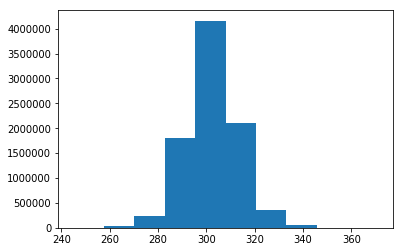

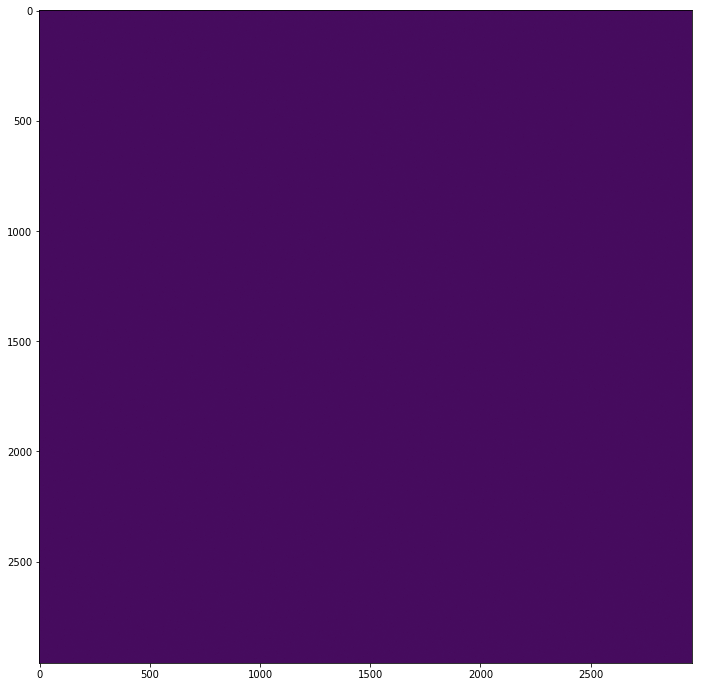

In [5]:
import numpy as np
from matplotlib import pyplot as plt

vmin,vmax = (0,10000)
img = Ti5.snap_image()

plt.hist(img.flatten())
Ti5.plot_img(img,vmin,vmax,img_size=(12,12))
plt.show()

### Live View

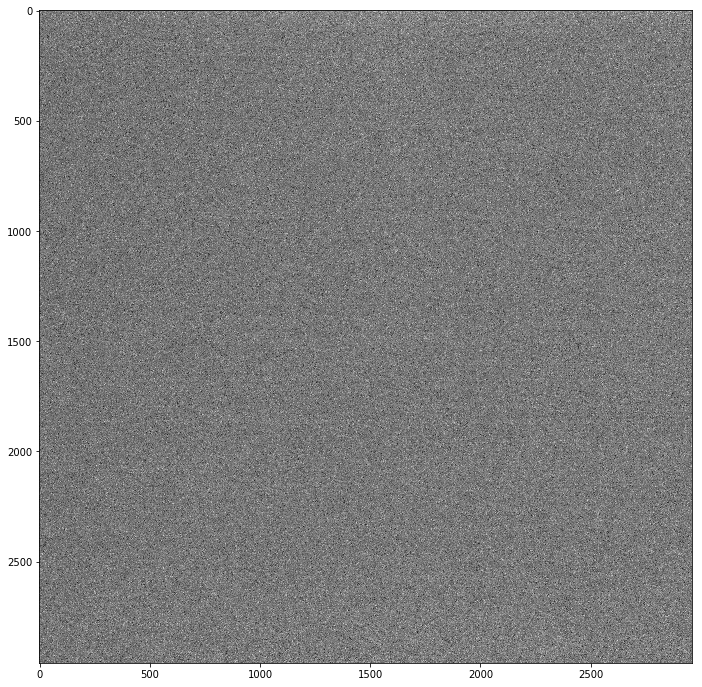

In [ ]:
Ti5.liveview()

### Test Grid and Multipoint Acquisition

In [ ]:
test_grid_ncols,test_grid_nrows = (2,2)
col_step,row_step = (640.0,636.0)

test_grid = Ti5.set_grid(test_grid_ncols,test_grid_nrows,col_step=col_step, row_step=row_step)

In [ ]:
test_folder_path = "F:/Daniel/2024-01-20_lDE30_Run_2/test/"
n_timepoints = 1

for t in range(n_timepoints):
    Ti5.multipoint_aq(test_grid,["BF","GFP","Cy5","Cy7"],t,output_folder=test_folder_path)

### Dry Run With Test Grid

#### Make Grid

In [6]:
test_grid_ncols,test_grid_nrows = (2,2)
col_step,row_step = (640.0,636.0)

test_grid = Ti5.set_grid(test_grid_ncols,test_grid_nrows,col_step=col_step, row_step=row_step)
mar.check_grid_corners(Ti5,test_grid,wait_time=0)

#### Run

In [7]:
output_folder = "F:/Daniel/2024-03-02_New_Marlin_Code_Test/"

fish = mar.FISH_scheduler(handler_1,Ti5,skip_fixation=False,fast_speed=2000,medium_speed=750,slow_speed=250,\
                      mins_fast_speed=4.,mins_medium_speed=7.,probe_load_rate_scaling=1.,fixation_load_rate_scaling=1.,\
                      channels=["BF","GFP","Cy5","Cy7"],output_folder=output_folder)
fish.run(test_grid,num_cycles=10)

PFA(half-MeAc)
PFA(half-MeAc) flowing to Stage at 0.0 Volts (0%)
PFA(half-MeAc) flowing to Waste at 0.0 Volts (0%)
PFA(half-MeAc) flowing to Waste at 2.442002442 Volts (48%)
PFA(half-MeAc) flowing to Waste at 0.915750915751 Volts (18%)
PFA(half-MeAc) flowing to Stage at 0.915750915751 Volts (18%)
Initialized.
EtOH(MeAc)
PFA(half-MeAc) flowing to Stage at 0.0 Volts (0%)
EtOH(MeAc) flowing to Waste at 0.0 Volts (0%)
EtOH(MeAc) flowing to Waste at 2.442002442 Volts (48%)
EtOH(MeAc) flowing to Waste at 0.915750915751 Volts (18%)
EtOH(MeAc) flowing to Stage at 0.915750915751 Volts (18%)
EtOH(MeAc) flowing to Stage at 0.30525030525 Volts (6%)
PFA(half-MeAc)
EtOH(MeAc) flowing to Stage at 0.0 Volts (0%)
PFA(half-MeAc) flowing to Waste at 0.0 Volts (0%)
PFA(half-MeAc) flowing to Waste at 2.442002442 Volts (48%)
PFA(half-MeAc) flowing to Waste at 0.915750915751 Volts (18%)
PFA(half-MeAc) flowing to Stage at 0.915750915751 Volts (18%)
Fixed.
Probe 1
PFA(half-MeAc) flowing to Stage at 0.0 Volts (

## Old Troubleshooting Code

In [ ]:
from pylab import *
ion()

import numpy as np
import matplotlib
import MMCorePy
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
%matplotlib inline  

### Init Nikon
 - make sure the scope is not escaped

In [ ]:
Ti5.mmc = MMCorePy.CMMCore()

In [ ]:
Ti5.mmc.loadSystemConfiguration("./MMMain.cfg")

In [ ]:
Ti5.mmc.setPrimaryLogFile("./presets/log.txt")

### Snap and plot an image

In [ ]:
Ti5.mmc.getLoadedDevices()

### Live View

In [ ]:
def liveview(camera,img_size=(12,12),low=None,high=None):#W,interval=0.5):
    mmc.setCameraDevice(camera)
    while True:
        try:
            while mmc.deviceBusy(camera):
                time.sleep(0.005)
            mmc.snapImage()
            im1 = mmc.getImage()
            clear_output(wait = True)
            plt.figure(figsize=img_size)
            if low == None or high == None:
                plt.imshow(im1, interpolation='None',cmap="gray")
            else:
                plt.imshow(im1, interpolation='None',cmap="gray",vmin=low,vmax=high)
            plt.show()
        except KeyboardInterrupt:
            break
    while mmc.deviceBusy(camera):
        time.sleep(0.01)
#         slp = interval - (time.time() - ti)
#         time.sleep(slp)

In [ ]:
Ti5.mmc.setShutterOpen("SpectraIII",False)

In [ ]:
liveview("BSI Prime",low=None,high=None)

### Snap and Contrast

In [ ]:
def snap_image(camera,img_size=(12,12)):
    mmc.setCameraDevice(camera)
    mmc.snapImage()
    im1 = mmc.getImage()
    return im1

def auto_contrast(img,low_percentile=0,high_percentile=100):
    low = np.percentile(img,low_percentile)
    high = np.percentile(img,high_percentile)
    return low,high

def plot_img(img,low,high,img_size=(12,12)):
    clear_output(wait = True)
    plt.figure(figsize=img_size)
    plt.imshow(im1, interpolation='None',vmin=low,vmax=high)
    plt.show()

In [ ]:
im1 = snap_image("BSI Prime")
low,high = auto_contrast(im1)
plot_img(im1,low,high)

### Imaging Parameters

In [ ]:
Ti5.mmc.getDevicePropertyNames('BSI Prime')

In [ ]:
Ti5.mmc.getProperty('BSI Prime',"Exposure")

#### Exposure

In [ ]:
Ti5.mmc.setExposure("BSI Prime",200.)

In [ ]:
Ti5.mmc.getExposure("BSI Prime")

#### Binning

In [ ]:
Ti5.mmc.getAllowedPropertyValues("BSI Prime","Binning")

In [ ]:
Ti5.mmc.setProperty("BSI Prime","Binning","1x1")

In [ ]:
Ti5.mmc.getProperty("BSI Prime","Binning")

#### metadata?

In [ ]:
Ti5.mmc.getAllowedPropertyValues("BSI Prime","MetadataEnabled")

In [ ]:
Ti5.mmc.getProperty("BSI Prime","MetadataEnabled")

In [ ]:
Ti5.mmc.snapImage()

In [ ]:
test = Ti5.mmc.getImage()

### Shutter

#### Changing SpectraIII Shutter

In [ ]:
Ti5.mmc.setShutterOpen("SpectraIII",True)

In [ ]:
Ti5.mmc.setShutterOpen("SpectraIII",False)

#### Changing Epi1 Shutter

In [ ]:
mmc.setShutterOpen("Turret1Shutter",True)

### Turret

In [ ]:
Ti5.mmc.getDevicePropertyNames('FilterTurret1')

In [ ]:
Ti5.mmc.getAllowedPropertyValues('FilterTurret1','Label')

In [ ]:
Ti5.mmc.getAllowedPropertyValues('FilterTurret1','State')

In [ ]:
Ti5.mmc.setProperty('FilterTurret1','State','2')

In [ ]:
Ti5.mmc.getProperty('FilterTurret1','Label')

In [ ]:
Ti5.mmc.getProperty('FilterTurret1','State')

### Spectra III

In [ ]:
Ti5.mmc.getDevicePropertyNames('SpectraIII')

In [ ]:
channels = ['VIOLET','BLUE','CYAN','TEAL','GREEN','YELLOW','RED','NIR']
for channel in channels:
    channel_int = channel + "_Intensity"
    print(Ti5.mmc.getProperty("SpectraIII",channel_int))

In [ ]:
Ti5.mmc.setProperty("SpectraIII","RED","0")

In [ ]:
Ti5.mmc.getProperty("SpectraIII","RED")

In [ ]:
Ti5.mmc.setProperty("SpectraIII","RED_Intensity","0")

In [ ]:
Ti5.mmc.getProperty("SpectraIII","RED_Intensity")

### Nosepiece

In [ ]:
Ti5.mmc.getDevicePropertyNames('Nosepiece')

In [ ]:
Ti5.mmc.getAllowedPropertyValues('Nosepiece','Label')

In [ ]:
Ti5.mmc.getAllowedPropertyValues('Nosepiece','State')

In [ ]:
Ti5.mmc.setProperty('Nosepiece','State','2')

In [ ]:
Ti5.mmc.getProperty('Nosepiece','Label')

### XYStage

In [ ]:
Ti5.mmc.getXYStageDevice()

In [ ]:
Ti5.mmc.getXYPosition()

In [ ]:
Ti5.mmc.deviceBusy("XYStage")

#### Example grid loop

In [ ]:
x_ori,y_ori = mmc.getXYPosition()
for x in range(0,2000,500):
    for y in range(0,2000,500):
        while mmc.deviceBusy("XYStage"):
            time.sleep(0.1)
            pass
        mmc.setXYPosition(x_ori+x,y_ori+y)

### ZStage

In [ ]:
Ti5.mmc.getPosition()

In [ ]:
Ti5.mmc.getFocusDirection("ZDrive")

In [ ]:
Ti5.mmc.setRelativePosition("ZDrive",-5000.)

In [ ]:
Ti5.mmc.getFocusDirection("ZDrive")

In [ ]:
Ti5.mmc.getFocusDevice()

### PFS

In [ ]:
Ti5.mmc.getDevicePropertyNames('PFS')

In [ ]:
Ti5.mmc.getAllowedPropertyValues('PFS','FocusMaintenance')

In [ ]:
Ti5.mmc.setProperty('PFS','FocusMaintenance','Off')

In [ ]:
Ti5.mmc.getProperty('PFS','FocusMaintenance')

In [ ]:
Ti5.mmc.deviceBusy("PFS")

### PFS Offset

In [ ]:
Ti5.mmc.getFocusDirection("PFSOffset")

In [ ]:
Ti5.mmc.setRelativePosition("PFSOffset",1.)

### Cool LED

In [ ]:
Ti5.mmc.getDevicePropertyNames('CoolLED')

In [ ]:
Ti5.mmc.setProperty('CoolLED','Volts','0')

In [ ]:
Ti5.mmc.getProperty('CoolLED','Volts')